Challenge:
    
In this module, we learned how to approach and solve regression problems using linear regression models. Throughout the module, you worked on a house price dataset from Kaggle. In this challenge, you will keep working on this dataset.

The scenario
The housing market is one of the most crucial parts of the economy for every country. Purchasing a home is one of the primary ways to build wealth and savings for people. In this respect, predicting prices in the housing market is a very central topic in economic and financial circles.

The house price dataset from Kaggle includes several features of the houses along with their sale prices at the time they are sold. So far, in this module, you built and implemented some models using this dataset.

In this challenge, you are required to improve your model with respect to its prediction performance.

To complete this challenge, submit a Jupyter notebook containing your solutions to the following tasks.

Steps:
- Load the houseprices data from Thinkful's database.

In [1]:
# Import some packages:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.mlab
import scipy.stats as atats
from scipy.stats import jarque_bera
from scipy.stats import boxcox
from scipy.stats import normaltest
import math
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse,rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.preprocessing import normalize, scale, StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Connect to the data base:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format( postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from houseprices', con=engine)
engine.dispose()

- Do data cleaning, exploratory data analysis, and feature engineering. You can use your previous work in this module. But make sure that your work is satisfactory.

In [3]:
# Look at the dataset:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.00,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [4]:
# Exploring Nulls and type of data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [5]:
# Look at the shape:
df.shape

(1460, 81)

In [6]:
# Find out number of uniquevalue and notnull in each columns:
df.nunique()

id               1460
mssubclass         15
mszoning            5
lotfrontage       110
lotarea          1073
street              2
alley               2
lotshape            4
landcontour         4
utilities           2
lotconfig           5
landslope           3
neighborhood       25
condition1          9
condition2          8
bldgtype            5
housestyle          8
overallqual        10
overallcond         9
yearbuilt         112
yearremodadd       61
roofstyle           6
roofmatl            8
exterior1st        15
exterior2nd        16
masvnrtype          4
masvnrarea        327
exterqual           4
extercond           5
foundation          6
                 ... 
bedroomabvgr        8
kitchenabvgr        4
kitchenqual         4
totrmsabvgrd       12
functional          7
fireplaces          4
fireplacequ         5
garagetype          6
garageyrblt        97
garagefinish        3
garagecars          5
garagearea        441
garagequal          5
garagecond          5
paveddrive

In [7]:
# Find out unique value in each column:
for column_name in df.columns:
    print("Unique values in column {} are: {}".format(column_name, df[column_name].unique()))

Unique values in column id are: [   1    2    3 ... 1458 1459 1460]
Unique values in column mssubclass are: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Unique values in column mszoning are: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in column lotfrontage are: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Unique values in column lotarea are: [ 8450  9600 11250 ... 17217 13175  9717]
Unique values in column street are: ['Pave' 'Grvl']
Unique values in column 

Unique values in column saleprice are: [208500 181500 223500 140000 250000 143000 307000 200000 129900 118000
 129500 345000 144000 279500 157000 132000 149000  90000 159000 139000
 325300 139400 230000 154000 256300 134800 306000 207500  68500  40000
 149350 179900 165500 277500 309000 145000 153000 109000  82000 160000
 170000 130250 141000 319900 239686 249700 113000 127000 177000 114500
 110000 385000 130000 180500 172500 196500 438780 124900 158000 101000
 202500 219500 317000 180000 226000  80000 225000 244000 185000 144900
 107400  91000 135750 136500 193500 153500 245000 126500 168500 260000
 174000 164500  85000 123600 109900  98600 163500 133900 204750 214000
  94750  83000 128950 106250 205000 178000 118964 198900 169500 100000
 115000 190000 136900 383970 217000 259500 176000 155000 320000 163990
 136000 153900 181000  84500 128000  87000 150000 150750 220000 171000
 231500 166000 204000 125000 105000 222500 122000 372402 235000  79000
 109500 269500 254900 162500 412500 10

In [8]:
# Findout missing values:
sum_null_columns = df.isnull().sum().sort_values(ascending=False)
percent_null_columns = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([sum_null_columns, percent_null_columns], axis=1, keys=['sum_null_columns', 'percent_null_columns'])
missing_data.head(20)

,sum_null_columns,percent_null_columns
poolqc,1453,99.52
miscfeature,1406,96.30
alley,1369,93.77
fence,1179,80.75
fireplacequ,690,47.26
lotfrontage,259,17.74
garagecond,81,5.55
garagetype,81,5.55
garageyrblt,81,5.55
garagefinish,81,5.55


In [9]:
# Dropping columns which have more than 45% missing values:
cols = df.columns[df.isnull().sum()*100/df.isnull().count()>45.00]
df = df.drop(cols, axis=1)

In [10]:
# Look at the shape again:
df.shape

(1460, 76)

In [11]:
# Clean dataset by droping duplicates:  
df.drop_duplicates(inplace=True) 

In [12]:
# Get statistical information summary for numerical columns:
df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


In [13]:
# Get statistical information summary for nonnumerical columns:
df.describe(include=['O'])

,mszoning,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,...,electrical,kitchenqual,functional,garagetype,garagefinish,garagequal,garagecond,paveddrive,saletype,salecondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1459,1460,1460,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,1334,735,1360,870,605,1311,1326,1340,1267,1198


In [14]:
# Findout numeric columns:
numeric_columns = df.select_dtypes(exclude=['object']).columns
print(numeric_columns)
print('Number of numeric columns is {}'.format(len(numeric_columns)))

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
       'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')
Number of numeric columns is 38


In [15]:
# Filling numeric columns:
for column in numeric_columns:
    df.loc[:,numeric_columns] = df.loc[:,numeric_columns].interpolate()

In [16]:
# Findout nonnumeric columns:
nonnumeric_columns=df.select_dtypes('object').columns
print(nonnumeric_columns)
print('number of nonnumeric columns is {}'.format(len(nonnumeric_columns)))

Index(['mszoning', 'street', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'garagetype', 'garagefinish', 'garagequal', 'garagecond',
       'paveddrive', 'saletype', 'salecondition'],
      dtype='object')
number of nonnumeric columns is 38


In [17]:
# Filling nonnumeric columns:
for i in range(1,len(df)):
    df.loc[i,nonnumeric_columns]=df.loc[i,nonnumeric_columns].fillna(df.loc[i-1,nonnumeric_columns])

In [18]:
# ???? Also, instead of above code, I use this code but didnt work why??
# df.loc[:,nonnumeric_columns]=df.loc[:,nonnumeric_columns].fillna(df.loc[:,nonnumeric_columns].mode())

As you know, in this dataset, saleprice is target variable and we want to predict the prices of the houses.

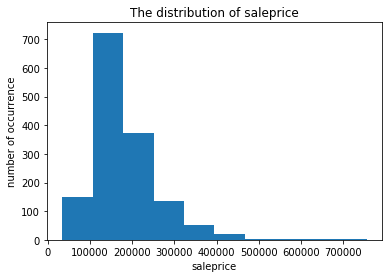

In [19]:
# Look at the distribution of target variable(saleprice):
plt.hist(df.saleprice)
plt.title("The distribution of saleprice")
plt.xlabel("saleprice")
plt.ylabel("number of occurrence")
plt.show()

As you can see here, the distribution of target variable is not normal and it is right skewed. Also, the majority of the observations have low saleprice values and few of the observations have high saleprice values. This makes the distribution of the target variable clustered at the left-most part of the histogram. 

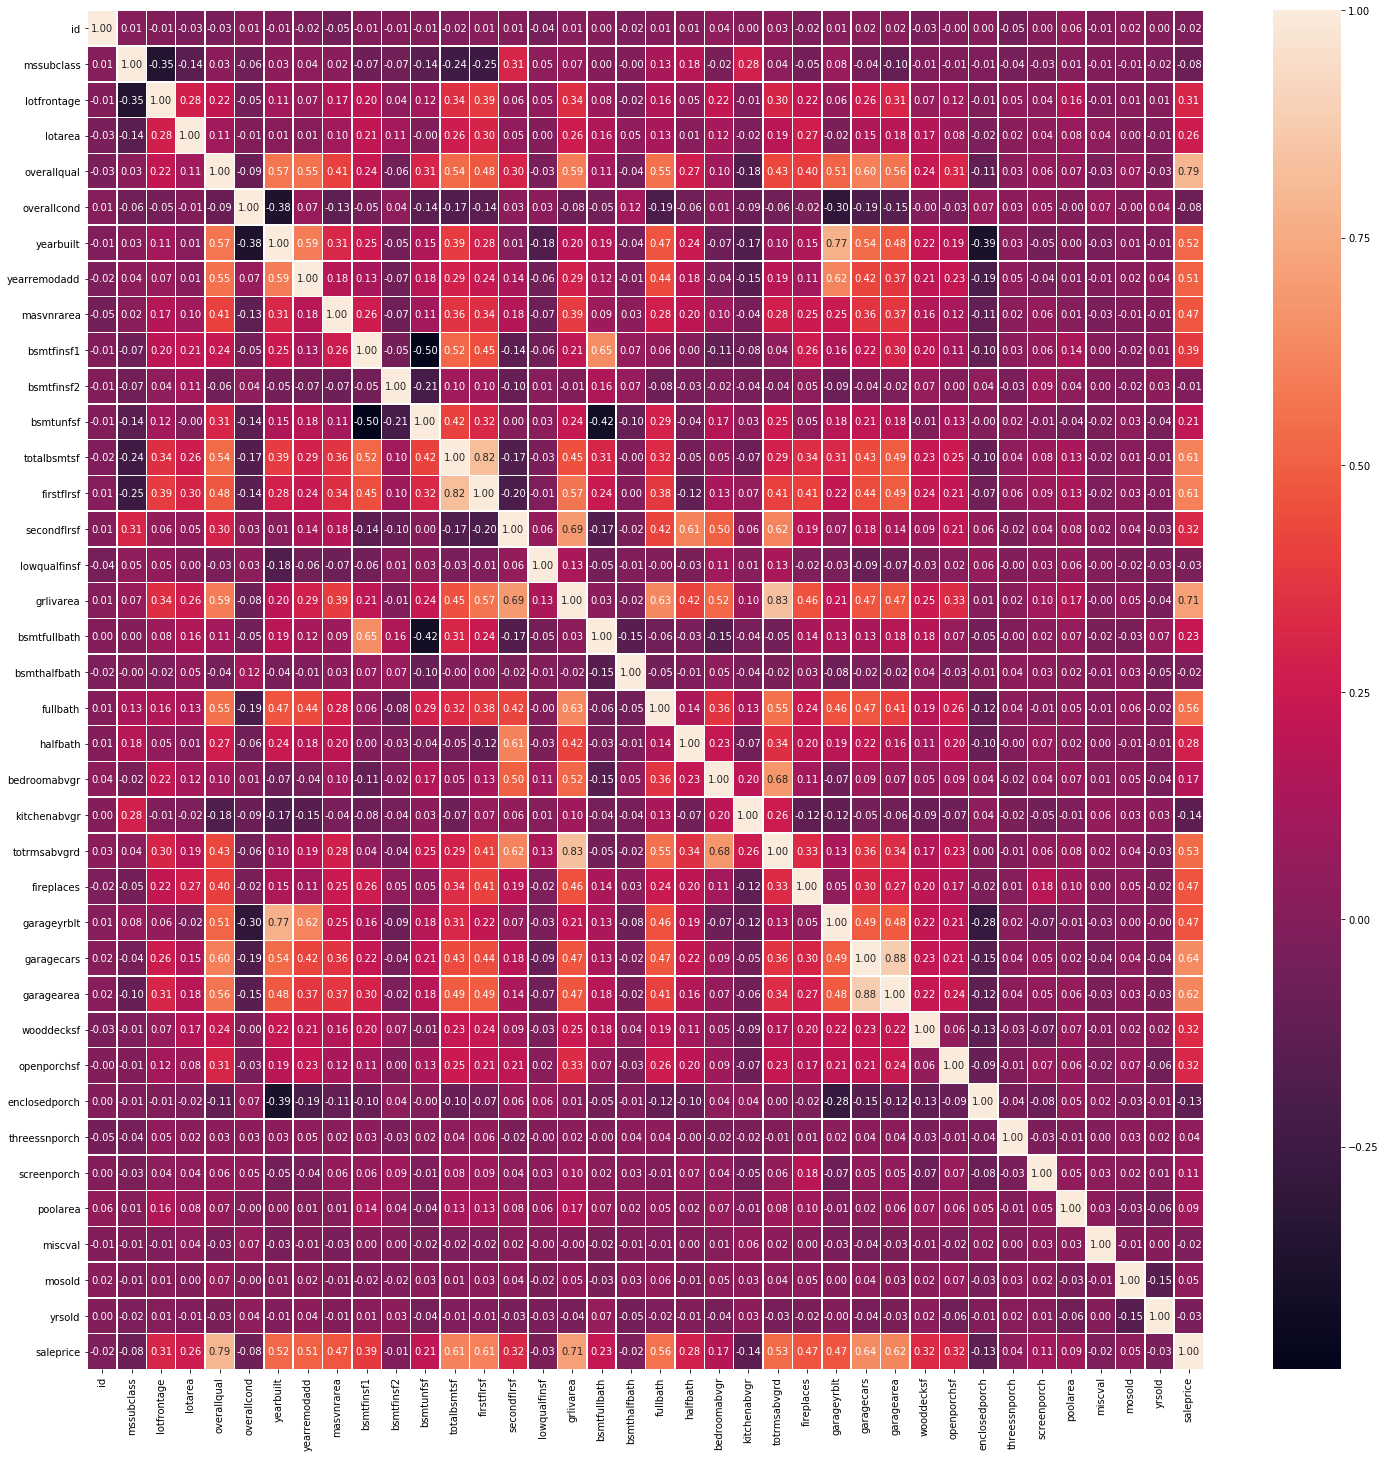

In [20]:
# Look at the correlationship between target variable and countinus columns:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f')

As shown here, saleprice has strong correlation with overallqual and grlivarea.

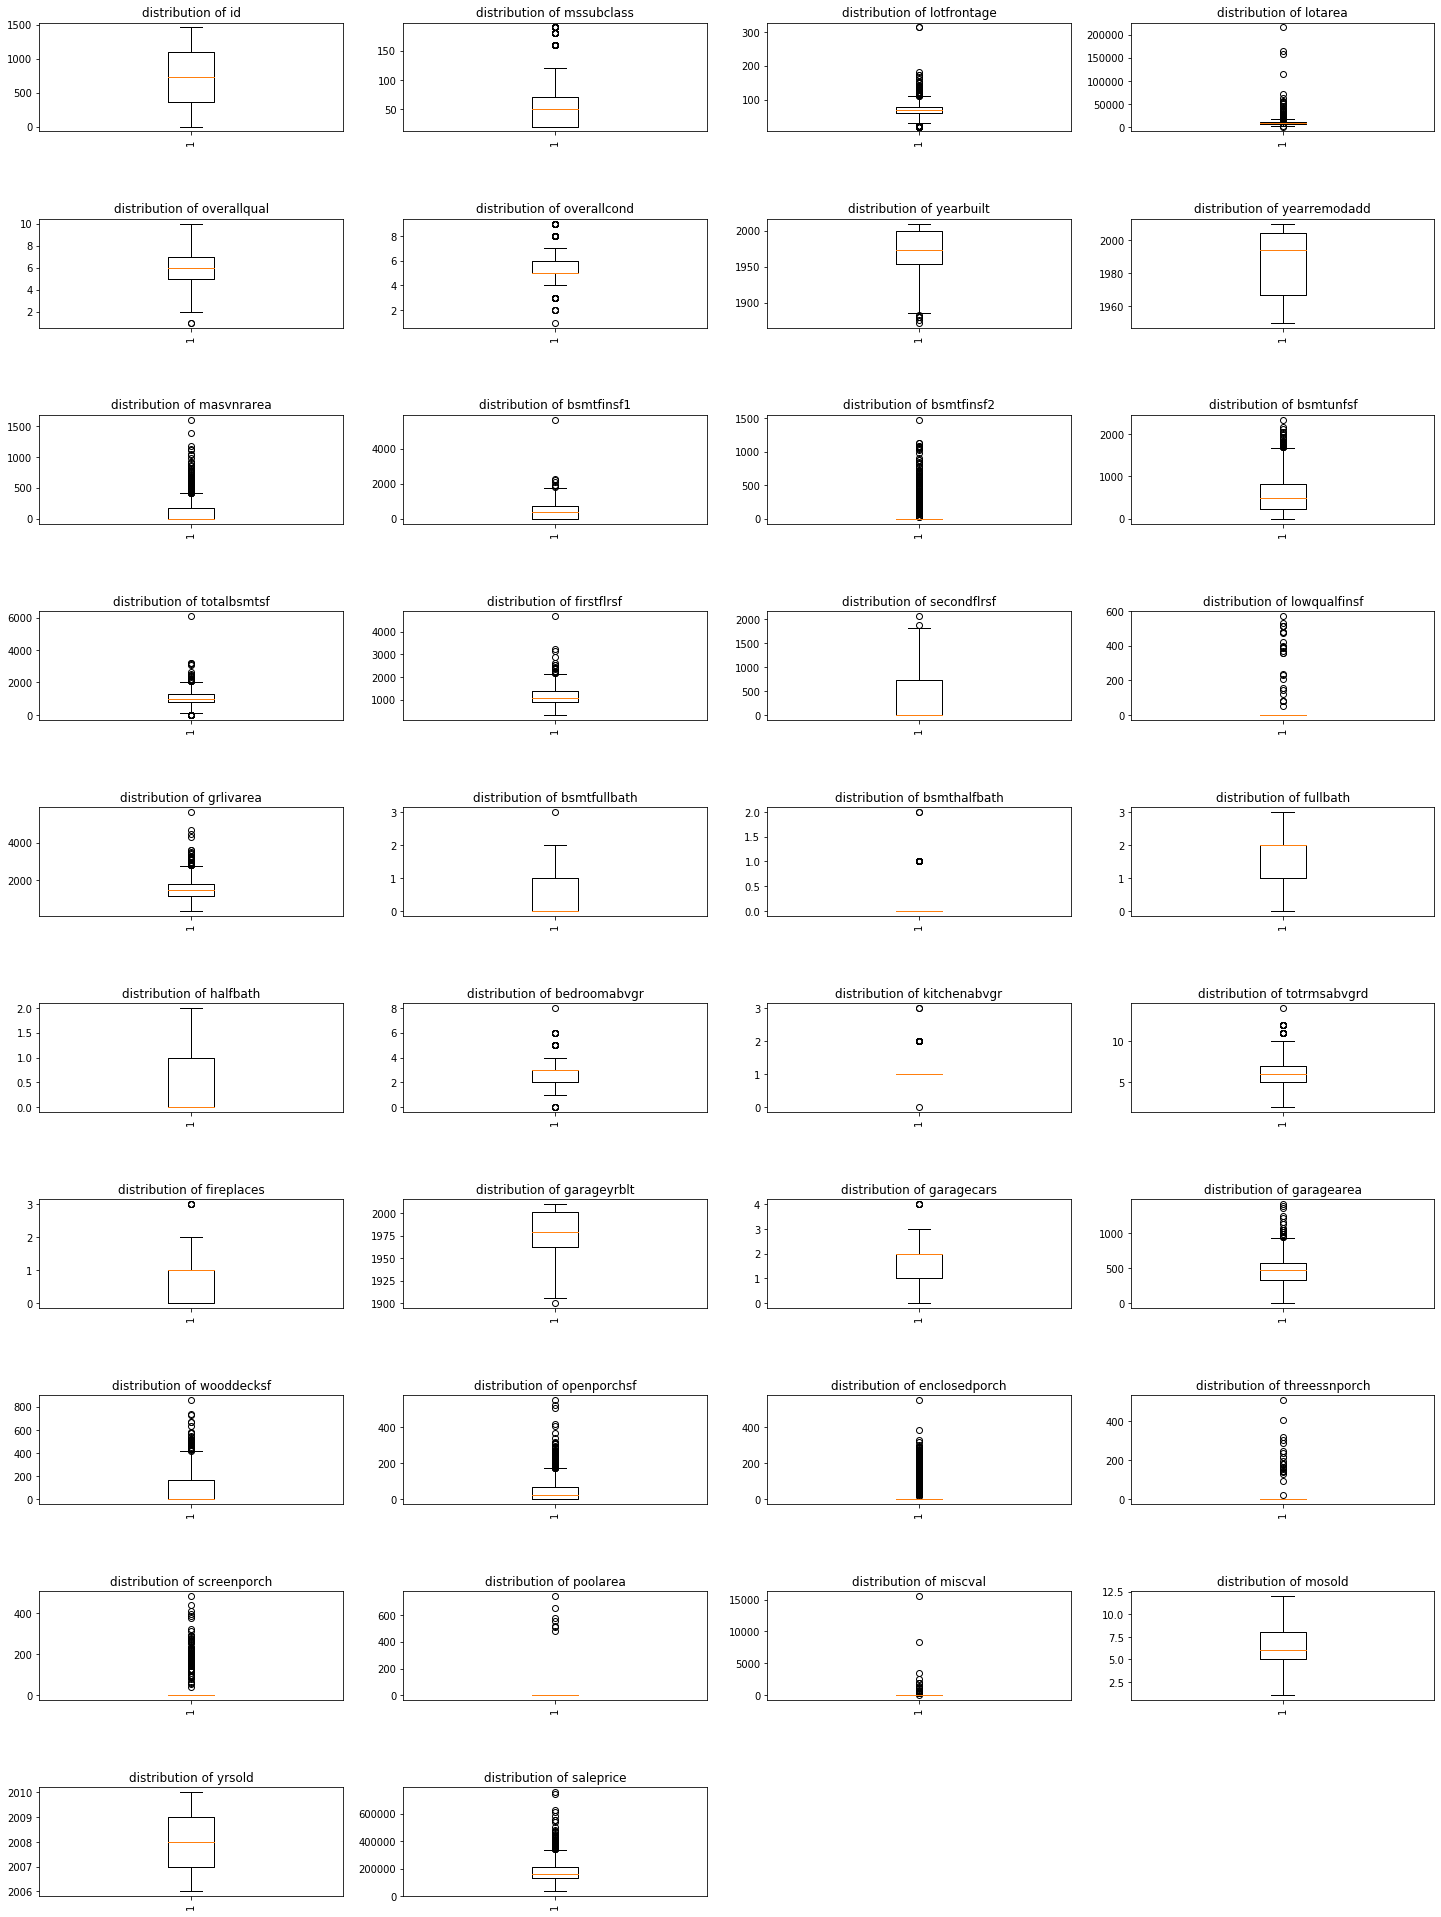

In [21]:
# Look at the distribution of numeric columns:
plt.figure(figsize=(25,50))
for i,column in enumerate(numeric_columns):
    plt.subplot(11, 4, i+1)
    plt.boxplot(df[column],whis=1.5)
    plt.title(f'distribution of {column}')
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

As you can see, some of numeric columns have outliers.

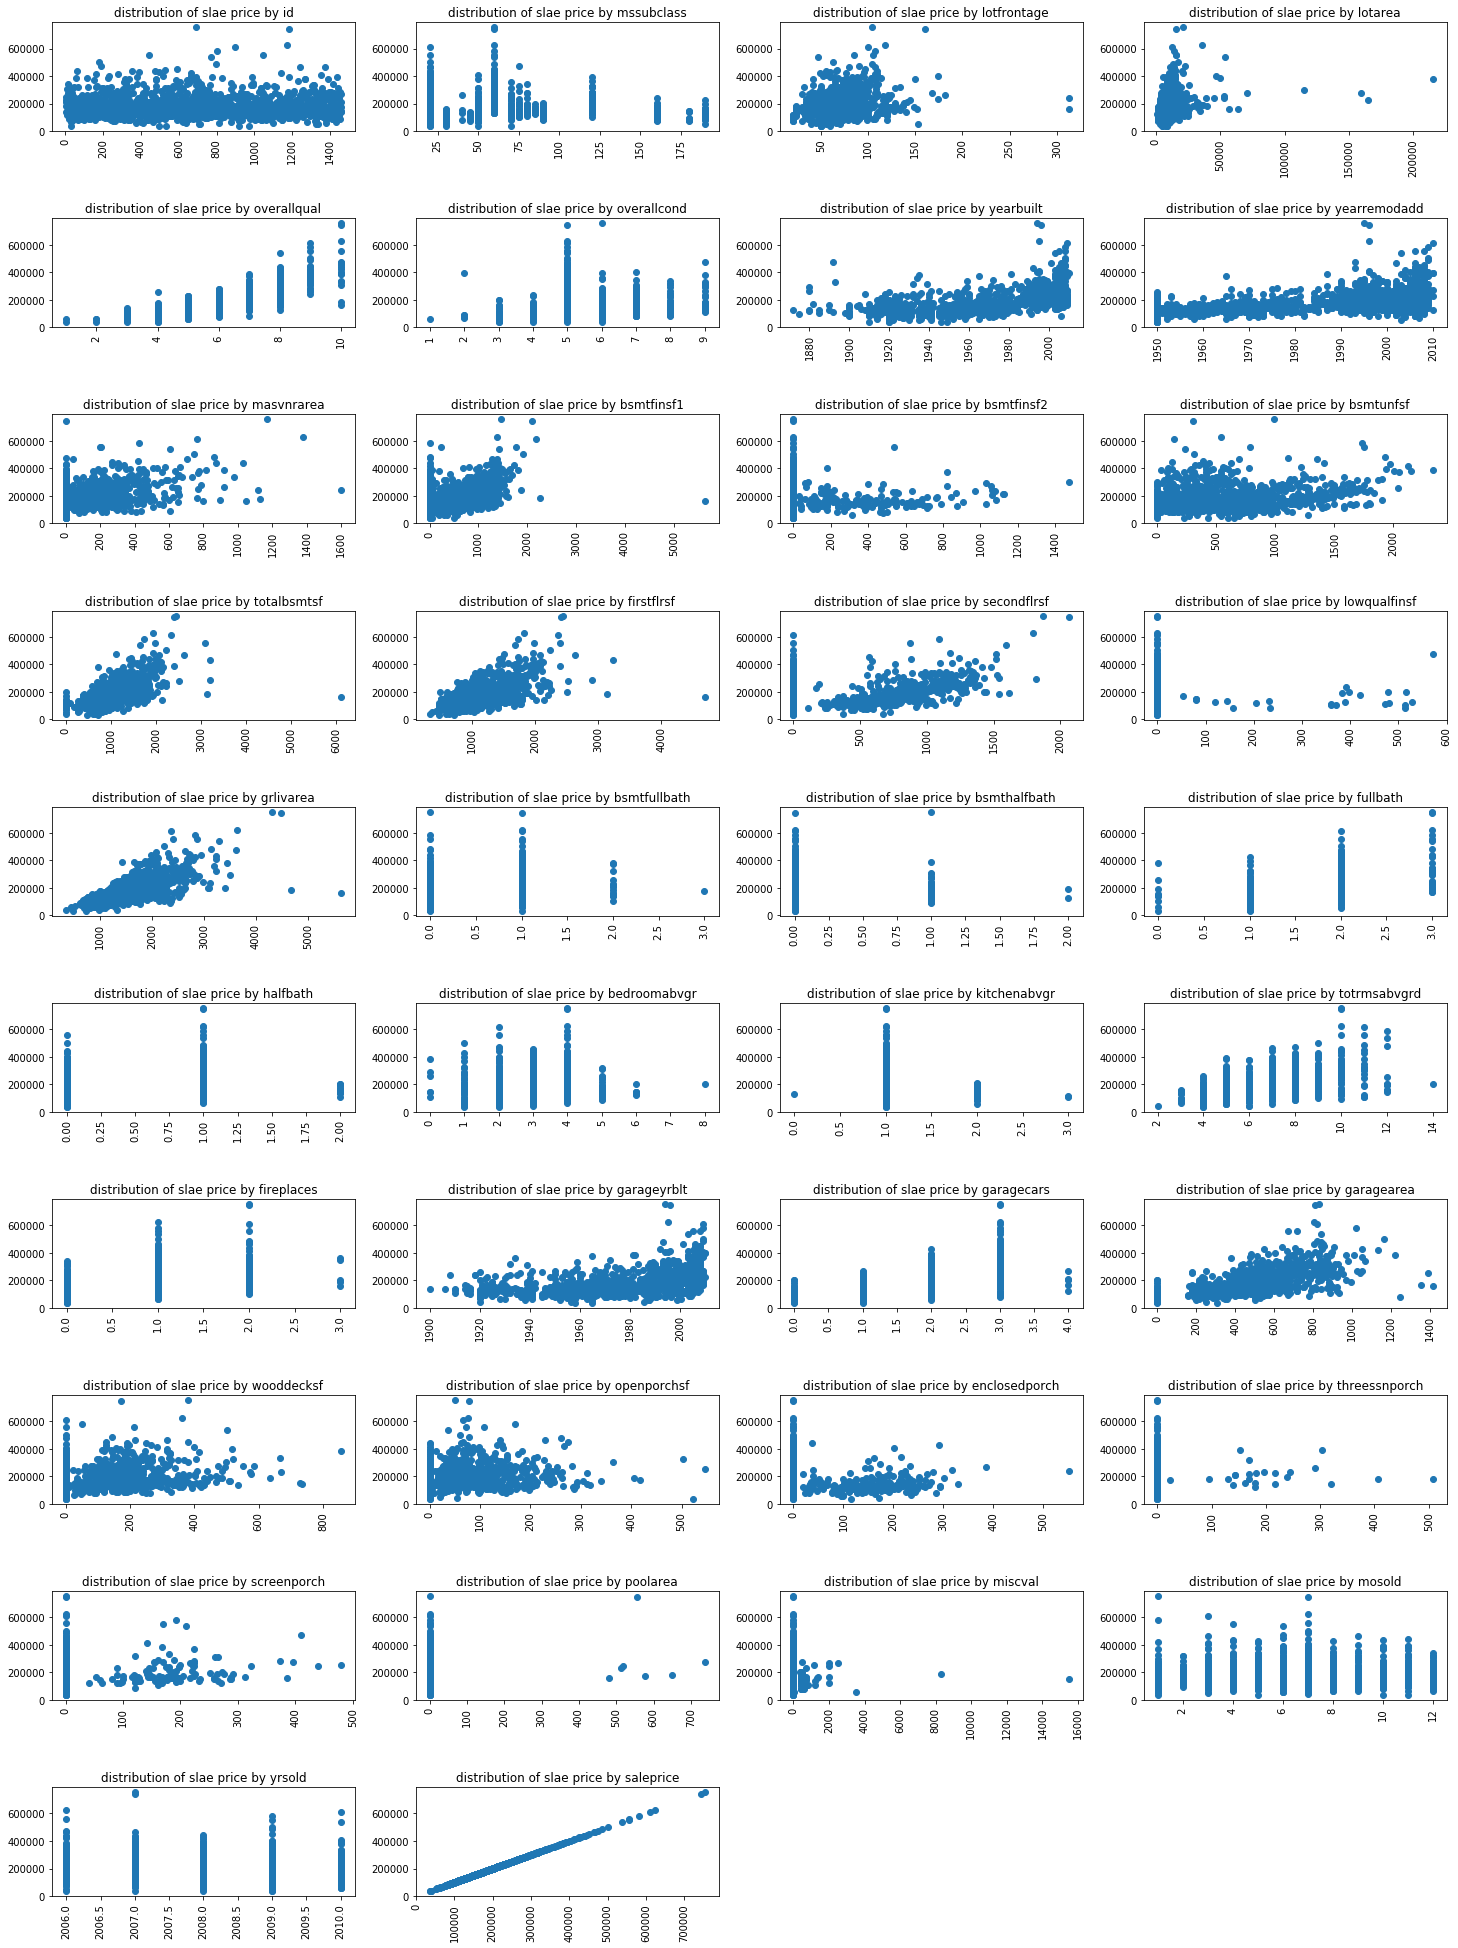

In [22]:
# Look at the distribution of target variable with numeric columns:
plt.figure(figsize=(25,50))
for i,column in enumerate(numeric_columns):
    plt.subplot(11, 4, i+1)
    plt.scatter(df[column], df['saleprice'])
    plt.title(f'distribution of slae price by {column}')
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

As shown, overallqual, grlivarea, garagcars, garagarea, totalbsmtsf, firstflrsf columns have fairly strong relationship with saleprice.???im not sure is it useful or not???

Now, look at the categorical variables to findout variables with wide range of the saleprice.

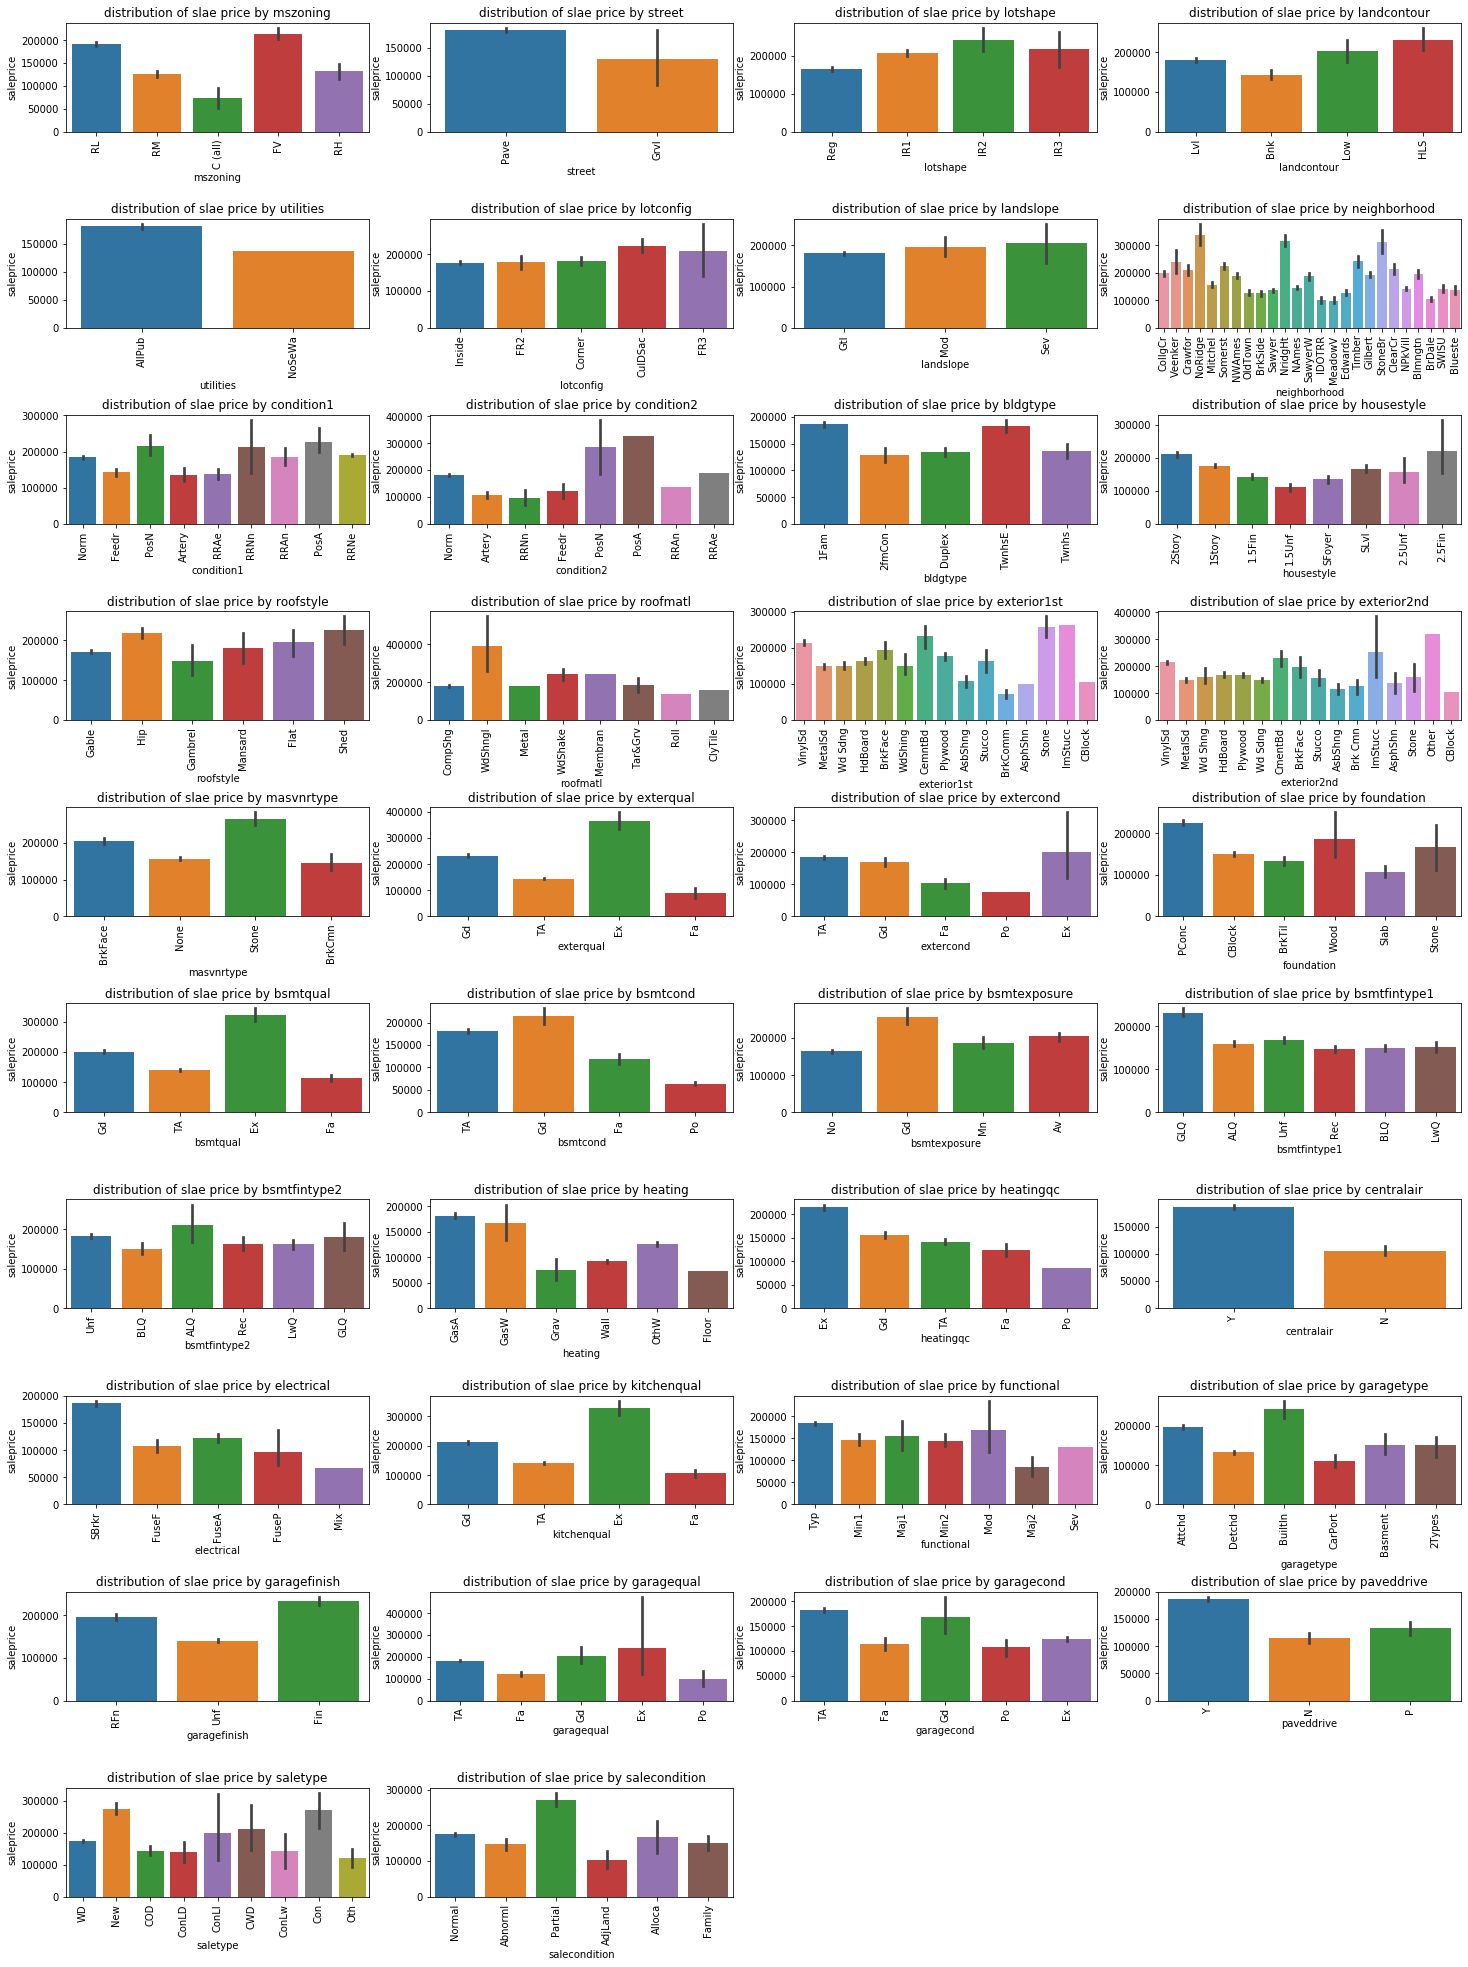

In [23]:
# Look at the distribution of target variable with nonnumeric columns:
plt.figure(figsize=(25,50))
for i,column in enumerate(nonnumeric_columns):
    plt.subplot(11, 4, i+1)
    sns.barplot(df[column], df['saleprice'])
    plt.title(f'distribution of slae price by {column}')
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

As shown, exterqual, roofmatl, garagequal, condition2 have wider range of saleprice.???im not sure is it useful or not???

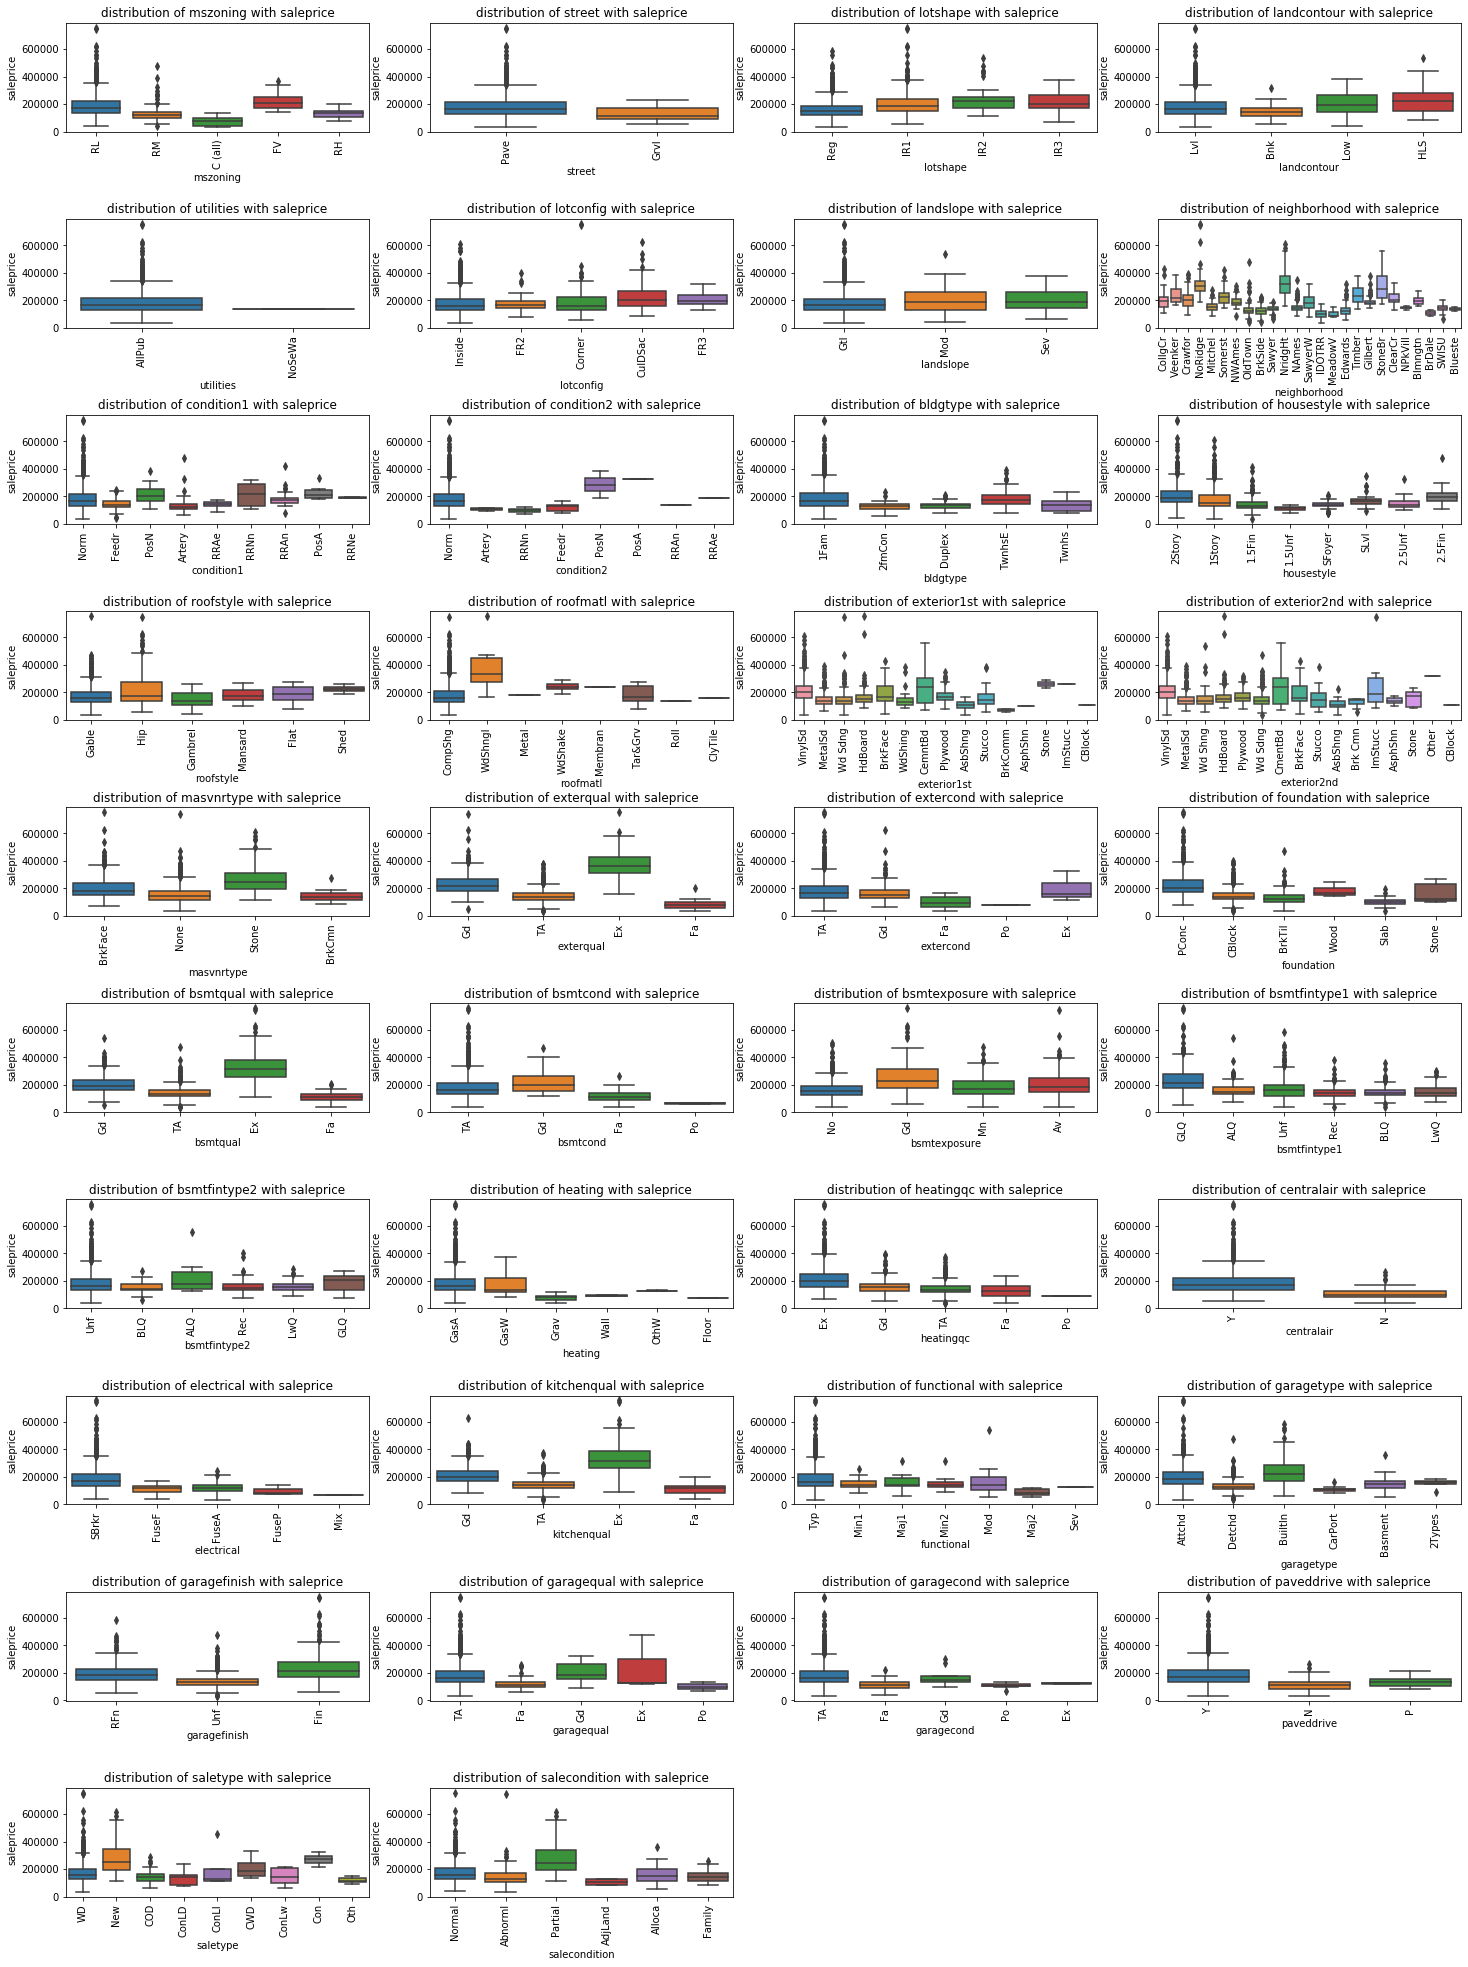

In [24]:
# Look at the distribution of nonnumeric columns with saleprice:
plt.figure(figsize=(25,50))
for i,column in enumerate(nonnumeric_columns):
    plt.subplot(11, 4, i+1)
    sns.boxplot(x= df[column], y='saleprice', data = df)
    plt.title(f'distribution of {column} with saleprice')
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()

By looking at the boxplot of categorical variables and saleprice, we foundout neighborhood, condition2, roofmatl, exterior2nd, exterqual, kitchenqual, bsmtqual have highest median of saleprice. ???im not sure is it useful or not???

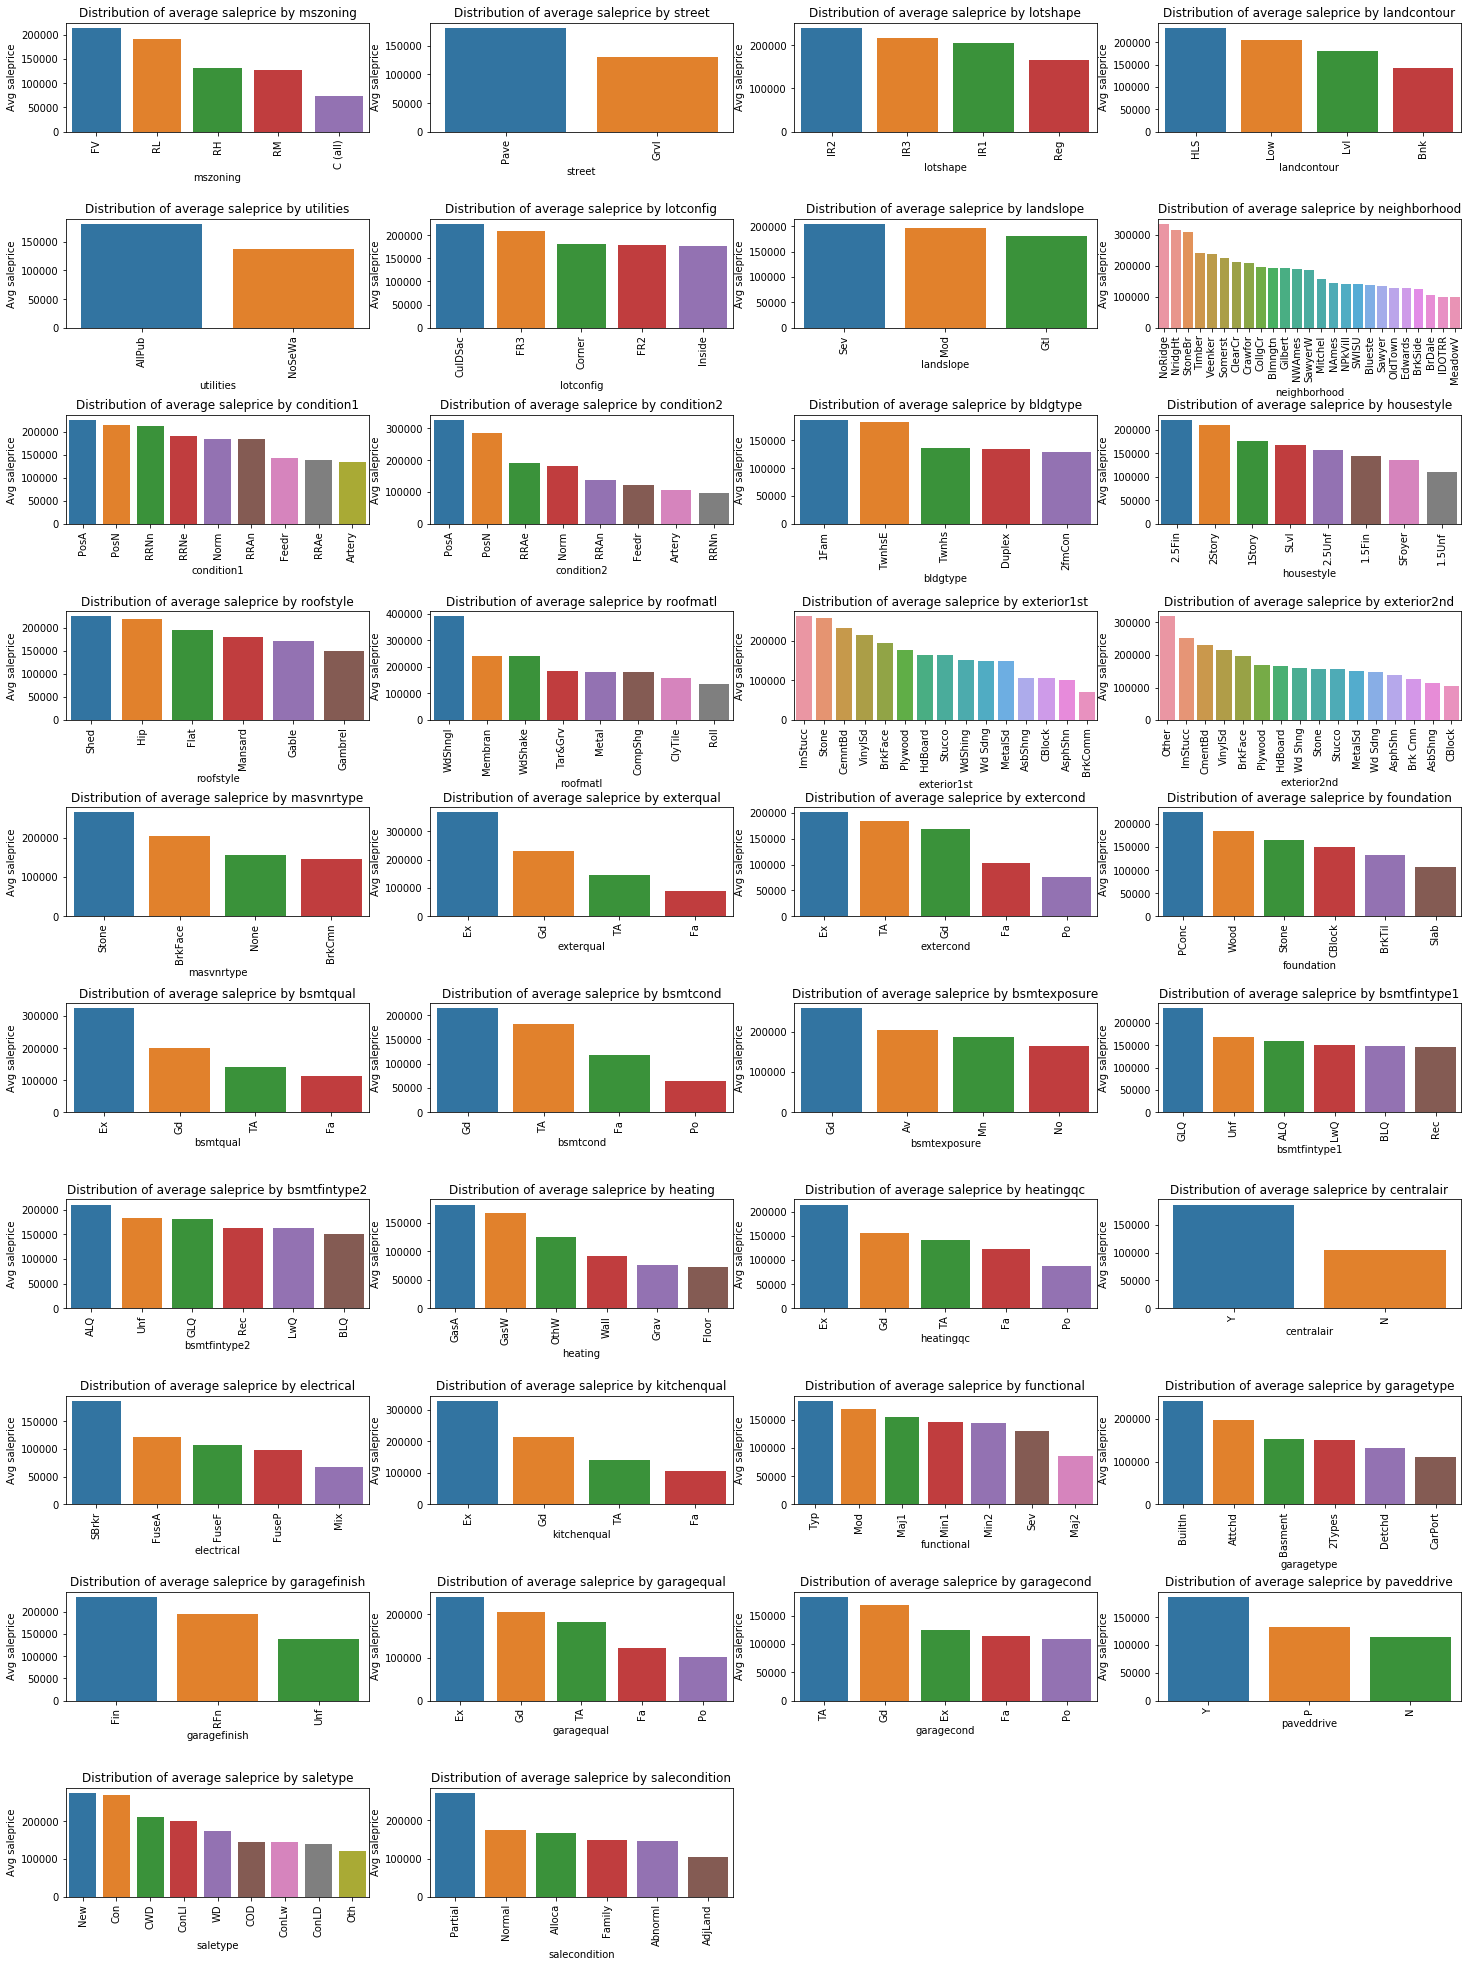

In [25]:
plt.figure(figsize=(25,50))
for i,column in enumerate(nonnumeric_columns):
    plt.subplot(11, 4, i+1)
    sns.barplot(df.groupby(column)["saleprice"].mean().sort_values(ascending=False).index, df.groupby(column)["saleprice"].mean().sort_values(ascending=False))
    plt.title(f"Distribution of average saleprice by {column}")
    plt.ylabel("Avg saleprice")
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace = 0.8, top = 0.7)
plt.show()


as shown, neighborhood, condition2, roofmatl, exterior2nd, exterqual, kitchenqual, bsmtqual have highest range of average saleprice. ???im not sure is it useful or not???

The categorical variables are strings and we need to convert them to numerical values.

In [26]:
categorical = df.select_dtypes(include=['object'])
categorical.head()

,mszoning,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,...,electrical,kitchenqual,functional,garagetype,garagefinish,garagequal,garagecond,paveddrive,saletype,salecondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [27]:
dummies = pd.get_dummies(categorical, drop_first=True)
dummies.head()

,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_HLS,landcontour_Low,...,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [28]:
# drop nonnumeric columns variables: 
df = df.drop(list(categorical.columns), axis=1)
df.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,1,60,65.00,8450,7,5,2003,2003,196.00,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.00,9600,6,8,1976,1976,0.00,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.00,11250,7,5,2001,2002,162.00,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.00,9550,7,5,1915,1970,0.00,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.00,14260,8,5,2000,2000,350.00,655,...,192,84,0,0,0,0,0,12,2008,250000


In [29]:
# Concat dummy variables with dataset:
df = pd.concat([df, dummies], axis=1)
df.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,1,60,65.00,8450,7,5,2003,2003,196.00,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.00,9600,6,8,1976,1976,0.00,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.00,11250,7,5,2001,2002,162.00,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.00,9550,7,5,1915,1970,0.00,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.00,14260,8,5,2000,2000,350.00,655,...,0,0,0,0,1,0,0,0,1,0


In [30]:
df.shape

(1460, 234)

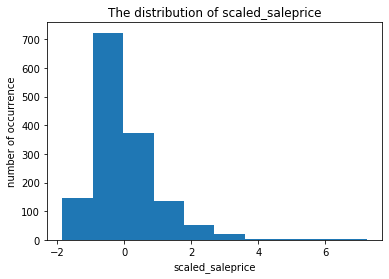

In [31]:
# For meodeling we have to assume the target variable to be normally distributed, so we can use standardized:
df["scaled_saleprice"] = scale(df["saleprice"])

plt.hist(df.scaled_saleprice)
plt.title("The distribution of scaled_saleprice")
plt.xlabel("scaled_saleprice")
plt.ylabel("number of occurrence")
plt.show()

Text(0, 0.5, 'saleprice value (standardized)')

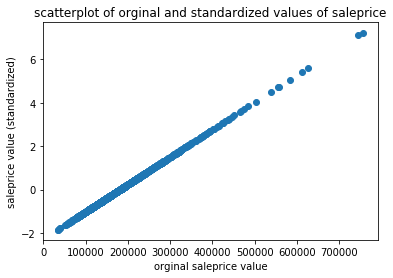

In [32]:
# Draw the scatter plot.
plt.scatter(df["saleprice"], df["scaled_saleprice"])
plt.title("scatterplot of orginal and standardized values of saleprice")
plt.xlabel("orginal saleprice value")
plt.ylabel("saleprice value (standardized)")

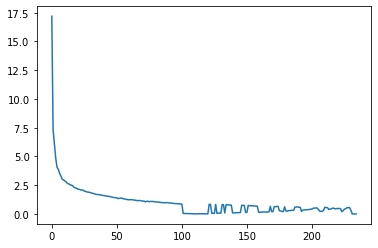

[ 1.71932653e+01  7.33046481e+00  6.05312272e+00  4.87015988e+00
  4.07681704e+00  3.87363982e+00  3.52975456e+00  3.30282631e+00
  3.01694958e+00  2.96783733e+00  2.86306916e+00  2.78983793e+00
  2.64959556e+00  2.61563413e+00  2.53586748e+00  2.49887691e+00
  2.45334392e+00  2.32387824e+00  2.26563182e+00  2.23385372e+00
  2.15655050e+00  2.13746881e+00  2.09953154e+00  2.07621871e+00
  2.08191494e+00  1.97712369e+00  1.96395777e+00  1.91369857e+00
  1.89179023e+00  1.86362268e+00  1.85434696e+00  1.79276006e+00
  1.78528061e+00  1.72716874e+00  1.71183550e+00  1.68425109e+00
  1.68365920e+00  1.65625223e+00  1.63786087e+00  1.61477676e+00
  1.59834434e+00  1.57424987e+00  1.55323880e+00  1.53214378e+00
  1.52366084e+00  1.49974295e+00  1.47598601e+00  1.44715401e+00
  1.41769752e+00  1.41459715e+00  1.39134485e+00  1.33518440e+00
  1.35490363e+00  1.37698562e+00  1.37358054e+00  1.30990387e+00
  1.29986080e+00  1.26388831e+00  1.25797890e+00  1.22257291e+00
  1.24301019e+00  1.24030

In [33]:
# Use eig_val plot to know how many component describe more percentage of variance in the dataset:
x= df
x=StandardScaler().fit_transform(x)
Xt = x.T
Cx = np.cov(Xt)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
# print scree plot
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

As you can see, around 50 components have lots of variance.???? correct or not??? and each component equal to any feature or not????

In [34]:
# Apply PCA to the x and see how much of the total variance is explained by the 50 components.
x= df
x=StandardScaler().fit_transform(x)
sklearn_pca = PCA(n_components=50)
Y_sklearn = sklearn_pca.fit_transform(x)
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)
print(f'By Applying PCA, the Percentage of Total Variance in dataset is explaind by the first component is:\n { sklearn_pca.explained_variance_ratio_} and sum: { sklearn_pca.explained_variance_ratio_.sum()}'
     )



By Applying PCA, the Percentage of Total Variance in dataset is explaind by the first component is:
 [0.07311272 0.0311721  0.02574032 0.02070976 0.01733599 0.01647187
 0.01500895 0.01404368 0.01282682 0.01261785 0.01216877 0.01186125
 0.011264   0.01111157 0.01077773 0.01062013 0.01042347 0.00986962
 0.009622   0.00948083 0.00914224 0.0090515  0.00889082 0.00880475
 0.00878554 0.00837798 0.00826593 0.00809729 0.00796351 0.00787438
 0.00783029 0.00750829 0.00734407 0.00723791 0.00718502 0.00701977
 0.00685766 0.00684695 0.00674723 0.00662915 0.00657777 0.00653965
 0.00631266 0.00625107 0.00619633 0.0060879  0.00597658 0.00586627
 0.00579803 0.00559772] and sum: 0.5639036644805089


???im not sure using pca is it useful or not ???

Now modeling the saleprice houses with linear regression.I choose highest correlationship variables between target variable and continuse variables; also, I choose categorical variables with wider range of saleprice, then using all of them to model.????? choosing features from continuse and categorical are correct way or not?????

saleprice: y = 𝛽0 + 𝛽1 overallqual + 𝛽2 grlivarea + 𝛽3 garagecars + 𝛽4 roofmatl + 𝛽5 exterqual + 𝛽6 bsmtqual + 𝜖

In [35]:
# Now we build a simple linear regression model and estimate it using OLS:

# Y is the target variable:
Y = df['saleprice']

# X is the feature set:
# ???????choose correct feature??????????
X = df[['overallqual','grlivarea', 'garagecars','roofmatl_CompShg', 'roofmatl_Membran', 'roofmatl_Metal',
        'roofmatl_Roll', 'roofmatl_Tar&Grv', 'roofmatl_WdShake','roofmatl_WdShngl', 'exterqual_Fa', 'exterqual_Gd',
        'exterqual_TA','bsmtqual_Fa', 'bsmtqual_Gd', 'bsmtqual_TA']]

# We create a LinearRegression model with statsmodels' sm linear_model module.

# We need to manually add a constant in statsmodels' sm
X = sm.add_constant(X)

# fit method estimates the coefficients using OLS
results = sm.OLS(Y,  X).fit()

# Inspect the results.
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     375.3
Date:                Tue, 24 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:12:29   Log-Likelihood:                -17346.
No. Observations:                1460   AIC:                         3.473e+04
Df Residuals:                    1443   BIC:                         3.482e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.403e+05   3.75e+04     -9.072      0.000   -4.14e+05   -2.67e+05
overallqual       1.604e+04   1175.817     13.640      0.000    1.37e+04    1.83e+04
grlivarea           54.9637      2.294     23.960      0.000      50.464      59.463
garagecars        1.493e+04   1633.570      9.138      0.000    1.17e+04    1.81e+04
roofmatl_CompShg  4.146e+05   3.64e+04     11.394      0.000    3.43e+05    4.86e+05
roofmatl_Membran  4.727e+05   5.07e+04      9.316      0.000    3.73e+05    5.72e+05
roofmatl_Metal    4.561e+05   5.09e+04      8.969      0.000    3.56e+05    5.56e+05
roofmatl_Roll      3.78e+05   5.05e+04      7.485      0.000    2.79e+05    4.77e+05
roofmatl_Tar&Grv  4.238e+05   3.78e+04     11.215      0.000     3.5e+05    4.98e+05
roofmatl_WdShake  4.067e+05   3.94e+04     10.310      0.000    3.29e+05    4.84e+05
roofmatl_WdShngl  4.979e+05   3.88e+04     12.829      0.000    4.22e+05    5.74e+05
exterqual_Fa     -7.033e+04    1.2e+04     -5.875      0.000   -9.38e+04   -4.68e+04
exterqual_Gd     -4.703e+04   6021.895     -7.809      0.000   -5.88e+04   -3.52e+04
exterqual_TA     -6.276e+04   6630.012     -9.467      0.000   -7.58e+04   -4.98e+04
bsmtqual_Fa      -6.348e+04   7365.807     -8.618      0.000   -7.79e+04    -4.9e+04
bsmtqual_Gd      -4.511e+04   4171.516    -10.814      0.000   -5.33e+04   -3.69e+04
bsmtqual_TA      -5.343e+04   4721.179    -11.317      0.000   -6.27e+04   -4.42e+04
==============================================================================
Omnibus:                      327.024   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10157.612
Skew:                           0.307   Prob(JB):                         0.00
Kurtosis:                      15.907   Cond. No.                     1.84e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- All explanatory variables are  statistically significant, because their p_values are less than 0.05 or 0.1. 
- R-squared is a proportion (between 0 and 1) that expresses how much variance in the outcome variable is explained by the explanatory variables in the model.
- Adjusted R-squared does the same job as R-squared, but it is adjusted according to the number of features included in the model, because,R-squared is biased as it tends to increase with the number of explanatory variables,use Adjusted R-squared.
- So, in this model: 
- R-squared is 0.81 and Adjusted R-squared of the model is 0.80 which means around 80% of the variance in the target variable explaind  by explanatory variables in the model and around 20% of the variance is unexplained. So, there is space for improvement.
- F_test is 375.3 and p_value is 0
- AIC is 34730 and BIC is 34820
????????????correct??????

- Now, split your data into train and test sets where 20% of the data resides in the test set.

In [36]:
# Split dataset:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


In [37]:
# We need to manually add a constant in statsmodels' sm
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     294.6
Date:                Tue, 24 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:12:29   Log-Likelihood:                -13875.
No. Observations:                1168   AIC:                         2.778e+04
Df Residuals:                    1151   BIC:                         2.787e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.405e+05   3.81e+04  

In this model:

- F_test is 294.6 and p_value is 0
- R-square and Adjust R-squared both are 0.80
- AIC is 27780 and BIC is 27870

According to the R-squared and Adjust R-squared almost 20% of the variance in the target variable is unexplained by explanatory variable in the model. So, there is a space for improvement.

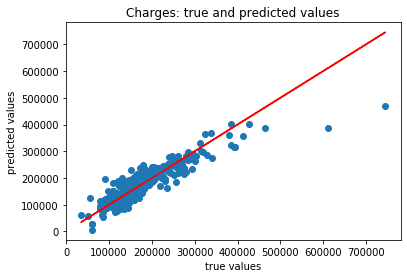

Mean absolute error of the prediction is: 23781.07143564818
Mean squared error of the prediction is: 1265439970.219197
Root mean squared error of the prediction is: 35573.023068319584
Mean absolute percentage error of the prediction is: 14.574542301766735


In [38]:
# We add constant to the model as it's a best practice to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))



Although these are different metrics, they are essentially using the difference between what we know to be correct saleprice house and predicted one from the model. So, lower values are desirable for all four metrics. The lower the value, the better the performance of the model. So because values for all three metrics are high except the last one, the performance of model is not satifactory. Also, model seems to better predicts low values because the points are more tightly clustered around the red line.????correct?????

In [39]:
# We fit an OLS model using sklearn:
lrm = LinearRegression()
lrm.fit(X_train, y_train)


# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in the training set is: 0.8037583211764852
-----Test set statistics-----
R-squared of the model in the test set is: 0.8115138893053648
Mean absolute error of the prediction is: 23781.071435648137
Mean squared error of the prediction is: 1265439970.2192557
Root mean squared error of the prediction is: 35573.023068320406
Mean absolute percentage error of the prediction is: 14.574542301766


As we see, the R-squared of the model in the training set is 0.80; also, R-squared of the model in the test set is 0.81.


- Build several linear regression models including Lasso, Ridge, or ElasticNet and train them in the training set. Use k-fold cross-validation to select the best hyperparameters if your models include one!

In [40]:
# LassoCV regression:

#???? how can i know give alpha numbers like below:???????
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)] 

lassoregr = LassoCV(alphas=alphas, cv=5) #?? cv what does means???
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("Best alpha value is: {}".format(lassoregr.alpha_))
print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


Best alpha value is: 100.0
R-squared of the model on the training set is: 0.78141712260801
-----Test set statistics-----
R-squared of the model on the test set is: 0.7978705473405003
Mean absolute error of the prediction is: 24391.971075899128
Mean squared error of the prediction is: 1357037330.8209603
Root mean squared error of the prediction is: 36837.9876054727
Mean absolute percentage error of the prediction is: 14.875297037017102


As we see, the R-squared of the model in the training set is 0.79; also, R-squared of the model in the test set is 0.80.


In [41]:
# Fitting a ridge regression model. 
ridgeregr = RidgeCV(alphas=alphas, cv=5)
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("Best alpha value is: {}".format(ridgeregr.alpha_))
print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


Best alpha value is: 1.0
R-squared of the model on the training set is: 0.7864279441495421
-----Test set statistics-----
R-squared of the model on the test set is: 0.8027156383426206
Mean absolute error of the prediction is: 24150.717021702563
Mean squared error of the prediction is: 1324508823.5965436
Root mean squared error of the prediction is: 36393.80199424819
Mean absolute percentage error of the prediction is: 14.748643761700572


As we see, the R-squared of the model in the training set is 0.79; also, R-squared of the model in the test set is 0.80.


In [42]:
# ElasticNet regression:
elasticregr = ElasticNetCV(alphas=alphas, cv=5)
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("Best alpha value is: {}".format(elasticregr.alpha_))
print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))



Best alpha value is: 0.01
R-squared of the model on the training set is: 0.7792049636057641
-----Test set statistics-----
R-squared of the model on the test set is: 0.7925845574839295
Mean absolute error of the prediction is: 24872.00701901832
Mean squared error of the prediction is: 1392525902.4829602
Root mean squared error of the prediction is: 37316.56337985802
Mean absolute percentage error of the prediction is: 15.126855779830569


As we see, the R-squared of the model in the training set is 0.78; also, R-squared of the model in the test set is 0.79.


- Evaluate your best model on the test set.

I think the Ridge regression model is the best one,because these four different metrics are essentially using for the difference between what we know to be correct saleprice house and predicted one from the model. So, lower values are desirable for all four metrics. The lower the value, the better the performance of the model. So, in ridge regression model values for all four metrics are lower than others.??????correct?????????/

- So far, you have only used the features in the dataset. However, house prices can be affected by many factors like economic activity and the interest rates at the time they are sold. So, try to find some useful factors that are not included in the dataset. Integrate these factors into your model and assess the prediction performance of your model. Discuss the implications of adding these external variables into your model.

I think, we can add some other factors such as interest rates, the duration of loan payment, loan prepayment amount, recession and world economic condition.????????????correct?????
?????????????how to add into the model and how to make data??????????